In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv(f'https://drive.google.com/uc?id=1Tih7ybpVpXsDMo1QI9x7DBxghSsQO0od')
df.head()

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2750 non-null   object
 1   generated  2750 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [ ]:
import pandas as pd
import re
import string
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Download resource nltk (jalankan sekali saja)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# =======================
# Stopwords + tambahan kata hubung
# =======================
stop_words = set(stopwords.words('english'))

# tambahkan kata hubung / kata tidak penting secara manual
extra_stopwords = {
    "and", "or", "but", "so", "because", "although", "though", "while",
    "if", "when", "until", "unless", "since", "yet", "either", "neither", "car", "would", "get", "also", "many"
}
stop_words = stop_words.union(extra_stopwords)

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    # lowercase
    text = text.lower()
    # remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # tokenize
    tokens = nltk.word_tokenize(text)
    # remove stopwords & kata satu huruf
    tokens = [w for w in tokens if w not in stop_words and len(w) > 1]
    # lemmatization saja (tanpa stemming)
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# apply ke dataset
df['clean_text'] = df['text'].apply(preprocess_text)

print("\nPreview setelah preprocessing:")
print(df[['text', 'clean_text']].head())


Preview setelah preprocessing:
                                                text  \
0  Machine learning, a subset of artificial intel...   
1  A decision tree, a prominent machine learning ...   
2  Education, a cornerstone of societal progress,...   
3  Computers, the backbone of modern technology, ...   
4  Chess, a timeless game of strategy and intelle...   

                                          clean_text  
0  machine learning subset artificial intelligenc...  
1  decision tree prominent machine learning algor...  
2  education cornerstone societal progress extend...  
3  computer backbone modern technology revolution...  
4  chess timeless game strategy intellect transce...  


In [ ]:
# =======================
# 3. TF-IDF Vectorizer
# =======================
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['generated']

/tmp/ipython-input-1474805478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='generated', data=df, palette="viridis")


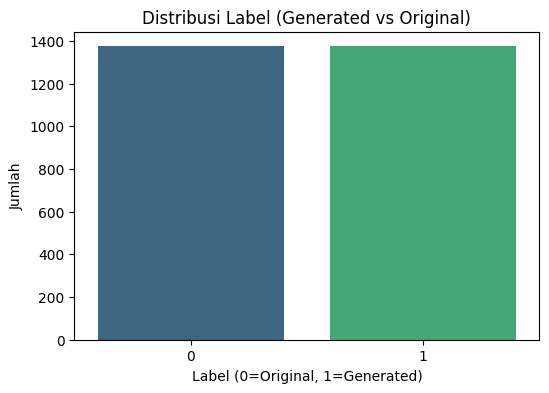

In [ ]:
# =======================
# 1. Distribusi Label
# =======================
plt.figure(figsize=(6,4))
sns.countplot(x='generated', data=df, palette="viridis")
plt.title("Distribusi Label (Generated vs Original)")
plt.xlabel("Label (0=Original, 1=Generated)")
plt.ylabel("Jumlah")
plt.show()

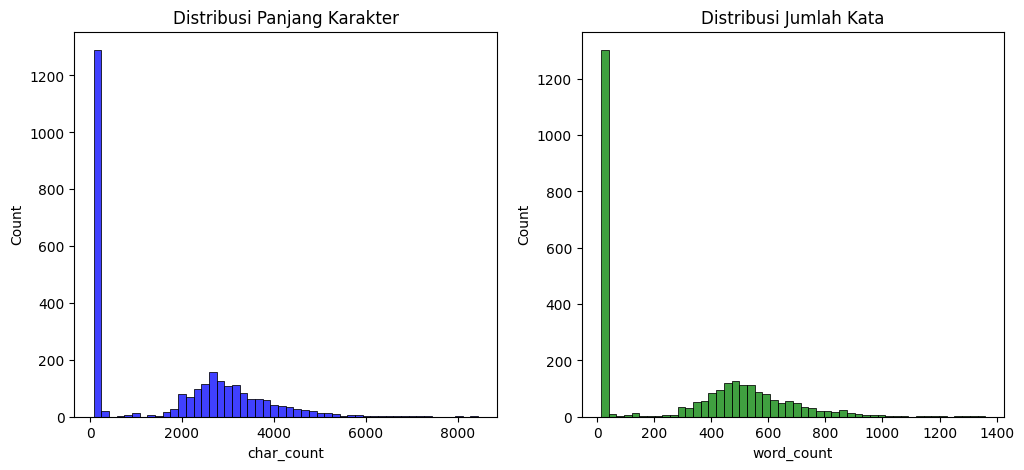

In [ ]:
# =======================
# 2. Panjang Kalimat
# =======================
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['char_count'], bins=50, color='blue')
plt.title("Distribusi Panjang Karakter")

plt.subplot(1,2,2)
sns.histplot(df['word_count'], bins=50, color='green')
plt.title("Distribusi Jumlah Kata")
plt.show()

/tmp/ipython-input-4253184231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='generated', y='word_count', data=df, palette="Set2")


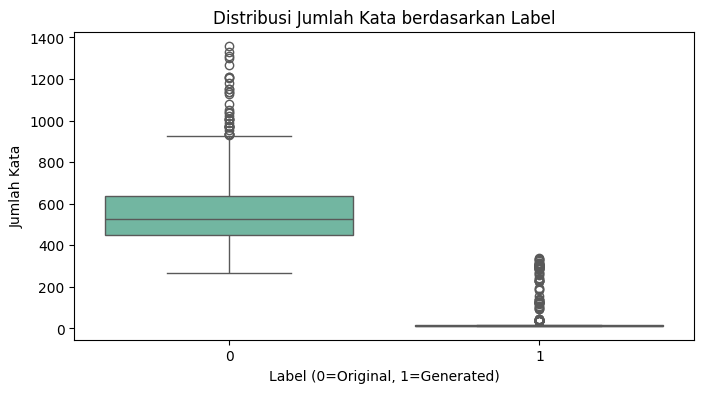

In [ ]:
# =======================
# 3. Rata-rata panjang per label
# =======================
plt.figure(figsize=(8,4))
sns.boxplot(x='generated', y='word_count', data=df, palette="Set2")
plt.title("Distribusi Jumlah Kata berdasarkan Label")
plt.xlabel("Label (0=Original, 1=Generated)")
plt.ylabel("Jumlah Kata")
plt.show()

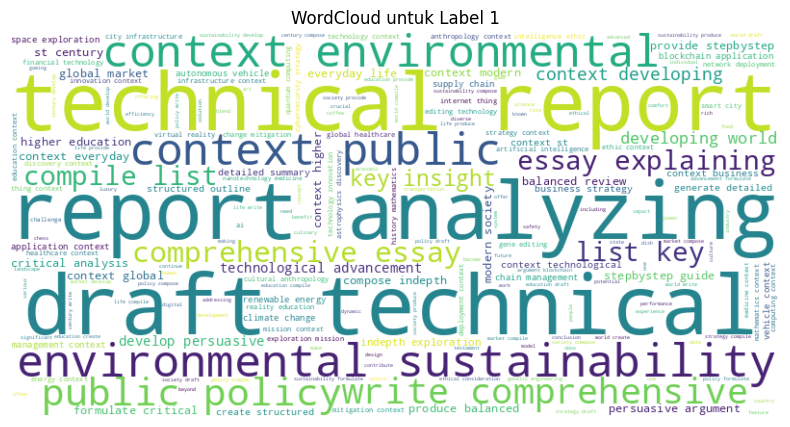

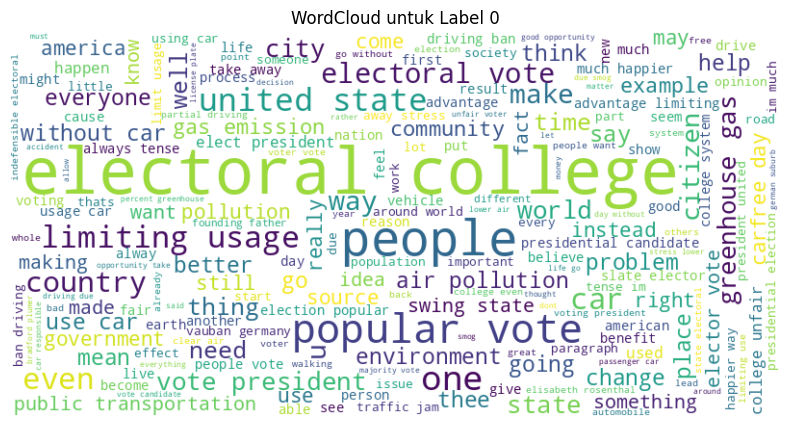

In [ ]:
# =======================
# 4. WordCloud per kelas
# =======================
for label in df['generated'].unique():
    text_data = " ".join(df[df['generated']==label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud untuk Label {label}")
    plt.show()

/tmp/ipython-input-64735763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


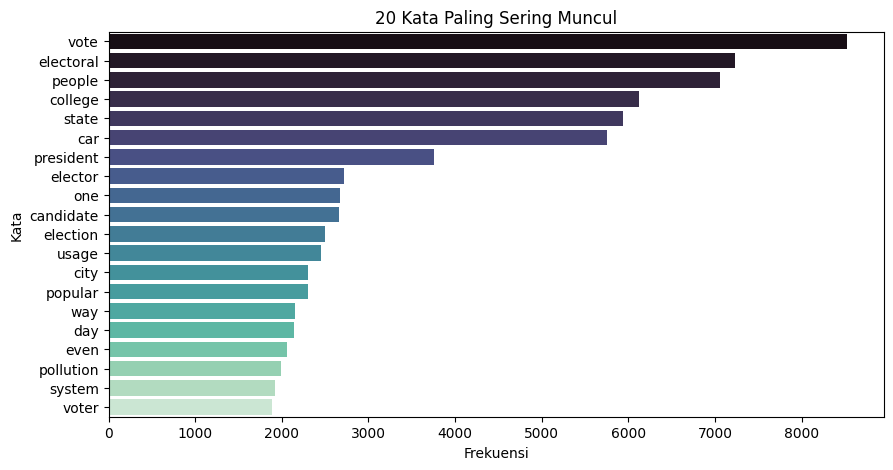

In [ ]:
# =======================
# 5. 20 Kata Terbanyak
# =======================
from collections import Counter

all_words = " ".join(df['clean_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette="mako")
plt.title("20 Kata Paling Sering Muncul")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()

car, would, get, also, many

In [ ]:
# =======================
# 4. Train-test split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# =======================
# 5. Model KNN
# =======================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# =======================
# 6. Evaluasi
# =======================
y_pred = knn.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9963636363636363

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       275
           1       1.00      0.99      1.00       275

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550

